In [143]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as img

In [144]:
with MPRester("VK9U10BEjITOk1kneKKl") as m:

    bandstructure = m.get_bandstructure_by_material_id("mp-924128")

# Bande interdite

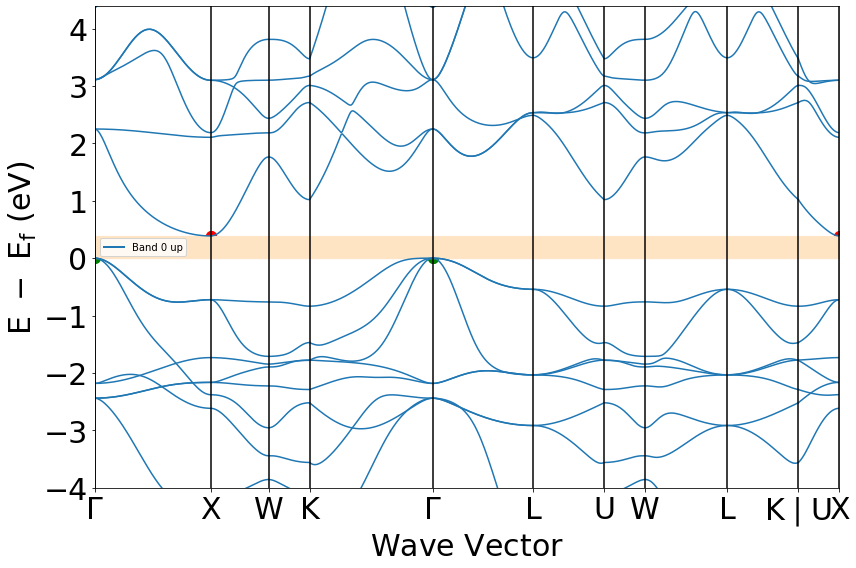

In [145]:
bsplotter = BSPlotter(bandstructure)
bsplotter.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(0,d[-1],1000),data['vbm'][0][1],data['cbm'][0][1],color='bisque')
plt.show()

In [157]:
bandgap = bandstructure.get_band_gap()
print("La bande interdite est indirecte et possède une valeur de", bandgap['energy'], "eV.")

La bande interdite est indirecte et possède une valeur de 0.3868999999999998 eV.


# Dispersion

In [147]:
data= bsplotter.bs_plot_data()
d = data.get('ticks').get('distance')
dist = np.array([d[1]-d[0], d[3]-d[1], d[5]-d[3], d[7]-d[5], d[9]-d[7], d[11]-d[9], d[13]-d[11], d[15]-d[13], d[17]-d[15], d[18]-d[17],])
directions = ["\u0393 - X","X - W", "W - K","K - \u0393","\u0393 - L","L - U", "U - W","W - L","L - K|U","K|U - X"]

In [148]:
print("Bandes contenant le max de la bande de valence :" , bandstructure.get_vbm()['band_index'])
print("Bandes contenant le min de la bande de conduction :" ,bandstructure.get_cbm()['band_index'])


Bandes contenant le max de la bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [17, 18, 19]})
Bandes contenant le min de la bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [20]})


La première bande de conduction est la n°20 et la dernière bande de valence peut être la n°19, 18 ou 17. Regardons les :

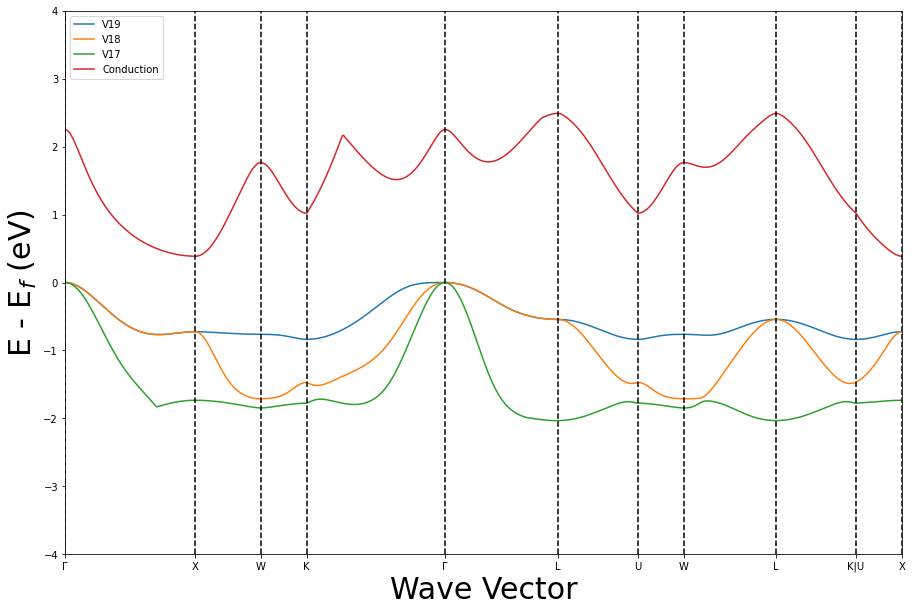

In [149]:
a = data.get('distances')
x = [y for b in a for y in b]

V19 = data.get('energy').get('1')[0][19]
for i in range(1,10):
    V19 = np.concatenate((V19,data.get('energy').get('1')[i][19]))

V18 = data.get('energy').get('1')[0][18]
for i in range(1,10):
    V18 = np.concatenate((V18,data.get('energy').get('1')[i][18]))

V17 = data.get('energy').get('1')[0][17]
for i in range(1,10):
    V17 = np.concatenate((V17,data.get('energy').get('1')[i][17]))
    
C = data.get('energy').get('1')[0][20]
for i in range(1,10):
    C = np.concatenate((C,data.get('energy').get('1')[i][20]))

plt.figure(figsize=(15,10)) 
plt.plot(x,V19,label='V19')
plt.plot(x,V18,label='V18')
plt.plot(x,V17,label='V17')
plt.plot(x,C,label='Conduction')

xs = [d[0],d[1],d[3],d[5],d[7],d[9],d[11],d[13],d[15],d[17],d[18]]
plt.xticks(xs,['\u0393',"X","W","K",'\u0393',"L","U","W","L","K|U","X"])

for di in xs :
    plt.axvline(di,color='black',ls='--')
    
plt.axis([0,d[-1],-4,4])
plt.legend()
plt.xlabel("Wave Vector",fontsize=30)
plt.ylabel("E - E$_f$ (eV)",fontsize=30)

plt.show()

Grâce au plot, on peut voir que la bande n°19 est au dessus des autres, c'est donc elle la dernière bande de valence à laquelle on va s'intéresser pour le reste.

Pour la dipersion, on va regarder quelle est la direction pour laquelle la pente en valeur absolue est maximale (plus grande dispersion) et minimale (plus petite dispersion) pour chacune des 2 bandes.
La pente qui sera calculée pour chaque direction sera celle de la droite passant par les points au début et à la fin du chemin. 

## Dernière bande de valence

In [158]:
#################Valence##################
pmax = 0
pmin = 1000
imaxV = 0
iminV = 0

for i in range(len(dist)) :
    energy = data.get('energy').get('1')[i][19]
    Ea = energy[0]
    Eb = energy[-1]
    pente = (Eb-Ea)/dist[i]
    
    if np.abs(pente) > np.abs(pmax) :
        pmax = pente
        imaxV = i
        
    if np.abs(pente) < np.abs(pmin) :
        pmin = pente
        iminV = i
        
print("Direction avec la plus grande dispersion : ", directions[imaxV], "avec une pente de ", pmax)
print("Direction avec la plus petite dispersion : ", directions[iminV], "avec une pente de ", pmin)

Direction avec la plus grande dispersion :  K - Γ avec une pente de  0.7680408020710267
Direction avec la plus petite dispersion :  X - W avec une pente de  -0.07434924630763318


## Première bande de conduction

In [159]:
#################Conduction##################
pmax = 0
pmin = 1000
imaxC = 0
iminC = 0

for i in range(len(dist)) :
    energy = data.get('energy').get('1')[i][20]
    Ea = energy[0]
    Eb = energy[-1]
    pente = (Eb-Ea)/dist[i]
    
    if np.abs(pente) > np.abs(pmax) :
        pmax = pente
        imaxC = i
        
    if np.abs(pente) < np.abs(pmin) :
        pmin = pente
        iminC = i
        
print("Direction avec la plus grande dispersion : ", directions[imaxC], "avec une pente de ", pmax)
print("Direction avec la plus petite dispersion : ", directions[iminC], "avec une pente de ", pmin)

Direction avec la plus grande dispersion :  X - W avec une pente de  2.679686971632197
Direction avec la plus petite dispersion :  Γ - L avec une pente de  0.26811617770744267


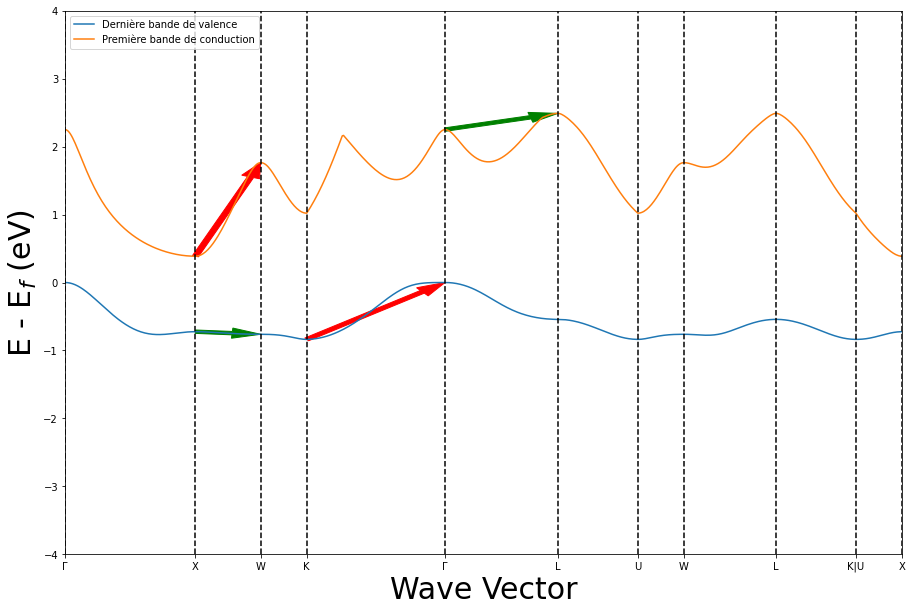

In [152]:
a = data.get('distances')
x = [y for b in a for y in b]

V19 = data.get('energy').get('1')[0][19]
for i in range(1,10):
    V19 = np.concatenate((V19,data.get('energy').get('1')[i][19]))
    
C = data.get('energy').get('1')[0][20]
for i in range(1,10):
    C = np.concatenate((C,data.get('energy').get('1')[i][20]))

plt.figure(figsize=(15,10)) 
plt.plot(x,V19,label='Dernière bande de valence')
plt.plot(x,C,label='Première bande de conduction')

xs = [d[0],d[1],d[3],d[5],d[7],d[9],d[11],d[13],d[15],d[17],d[18]]
plt.xticks(xs,['\u0393',"X","W","K",'\u0393',"L","U","W","L","K|U","X"])

for di in xs :
    plt.axvline(di,color='black',ls='--')
    
plt.axis([0,d[-1],-4,4])
plt.legend()
plt.xlabel("Wave Vector",fontsize=30)
plt.ylabel("E - E$_f$ (eV)",fontsize=30)

plt.arrow(xs[imaxV],data.get('energy').get('1')[imaxV][19][0],dist[imaxV],
          data.get('energy').get('1')[imaxV][19][-1]-data.get('energy').get('1')[imaxV][19][0], 
          width = 0.05,length_includes_head=True,color='r')
plt.arrow(xs[iminV],data.get('energy').get('1')[iminV][19][0],dist[iminV],
          data.get('energy').get('1')[iminV][19][-1]-data.get('energy').get('1')[iminV][19][0],
          width = 0.05,length_includes_head=True,color='g')
plt.arrow(xs[imaxC],data.get('energy').get('1')[imaxC][20][0],dist[imaxC],
          data.get('energy').get('1')[imaxC][20][-1]-data.get('energy').get('1')[imaxC][20][0],
          width = 0.05,length_includes_head=True,color='r')
plt.arrow(xs[iminC],data.get('energy').get('1')[iminC][20][0],dist[iminC],
          data.get('energy').get('1')[iminC][20][-1]-data.get('energy').get('1')[iminC][20][0],
          width = 0.05,length_includes_head=True,color='g')

plt.show()

Les flèches vertes représentent la plus petite dispersion et les flèches rouges la plus grande.

# Masse effective

In [153]:
print("Maximums de la bande de valence : ",data['vbm'])
print("\nMinimums de la bande conduction : ",data['cbm'])

Maximums de la bande de valence :  [(0.0, 0.0), (2.9945954696585035, 0.0), (2.9945954696585035, 0.0)]

Minimums de la bande conduction :  [(1.0275827099024104, 0.3868999999999998), (1.0275827099024104, 0.3868999999999998), (6.596256259611895, 0.3868999999999998)]


Les points (2.9945954696585035, 0.0) et (1.0275827099024104, 0.3868999999999998) seront utilisés pour calculer les masses effectives par soucis de clarté pour les représentations.

La masse effective peut se calculer via cette formule : $$m_{i,j}^* = \hbar^2 \left(\frac{\delta^2 E}{\delta k_i \delta k_j}\right)^{-1}$$

En supposant une dispersion parabolique, l'énergie E peut se généraliser :
$$E = ak^2 + bk + c$$

Pour trouver les coefficients $a$, $b$ et $c$, il suffit de faire une interpolation polynomiale en prenant 3 points : le point qui correspond au max/min de la bande, un point un peu après et un point un peu avant.

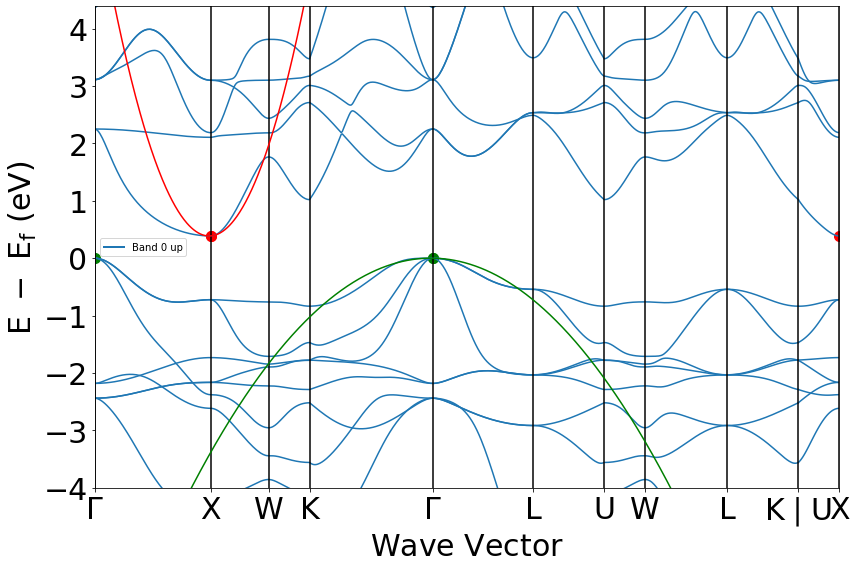

In [154]:
ecart = 3

x3v = np.array([data['distances'][3][-ecart-1],data['distances'][4][0],data['distances'][4][ecart]])
x3c = np.array([data['distances'][0][-ecart-1],data['distances'][1][0],data['distances'][1][ecart]])

y3v = np.array([data.get('energy').get('1')[3][19][-ecart-1],data.get('energy').get('1')[4][19][0],data.get('energy').get('1')[4][19][ecart]])
coefv = np.polyfit(x3v,y3v,2)

y3c = np.array([data.get('energy').get('1')[0][20][-ecart-1],data.get('energy').get('1')[1][20][0],data.get('energy').get('1')[1][20][ecart]])
coefc = np.polyfit(x3c,y3c,2)

x = np.linspace(0,d[-1],1000)

yv =coefv[0]*x**2+coefv[1]*x+coefv[2]
yc =coefc[0]*x**2+coefc[1]*x+coefc[2]

bsplotter.get_plot(vbm_cbm_marker=True)
plt.plot(x,yv,color='g')
plt.plot(x,yc,color='r')
plt.show()

Le graphe ci-dessus montre les polynômes obtenus avec les résultats de l'interpolation.

Il ne reste donc plus qu'à calculer la masse effective pour chaque bande qui vaut alors : $$m^* = \frac{\hbar^2}{2a}$$

Il faut également faire attention aux unités car $E$ est en $eV$ et $k$ en $\mathring{A}^{-1}$. Les 2 doivent donc être ramenés dans le Système International, sachant que $1 eV = 1.60218 10^{-19} J$ et $1 \mathring{A} = 10^{-10} m$.

In [155]:
h_ = (6.62607015e-34)/(2*math.pi)
to_SI = 1e20/1.60218e-19
mv = (h_**2/(2*coefv[0]))*to_SI
mc = (h_**2/(2*coefc[0]))*to_SI
me = 9.1094e-31

print("Masse effective au sommet de la dernière bande de valence : \n m*= ", mv, "[kg] \n me* = ",mv/me)
print("----------------")
print("Masse effective à la base de la première bande de conduction : \n m*= ", mc, "[kg] \n me* = ",mc/me)

Masse effective au sommet de la dernière bande de valence : 
 m*=  -3.9037573891561626e-30 [kg] 
 me* =  -4.285416590726242
----------------
Masse effective à la base de la première bande de conduction : 
 m*=  6.074176424927127e-31 [kg] 
 me* =  0.6668031291772376


Le me* ci-dessus correspond au rapport $\frac{m^*}{m_{électron}}$